In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns


In [17]:
data = pd.read_excel('tvis07.xls')
data.dropna(inplace=True)
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,WTFT,WTBK
0,245,205.0
1,262,200.0
2,255,220.0
3,251,210.0
4,244,191.0


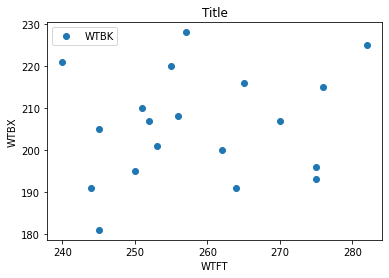

In [32]:
data.plot(x='WTFT',y='WTBK',style='o')
plt.title("Title")
plt.xlabel('WTFT')
plt.ylabel('WTBX')
plt.show()

In [81]:
X = data.iloc[:,0]
Y = data.iloc[:,1]

X = data['WTFT'].values.reshape(-1,1)
Y = data['WTBK'].values.reshape(-1,1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [87]:

regression = LinearRegression()
regression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = regression.predict(X_test)
y_pred

array([[204.11078346],
       [203.80224112],
       [203.72510554],
       [203.66339707]])

In [93]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,225.0,204.110783
1,200.0,203.802241
2,228.0,203.725106
3,201.0,203.663397


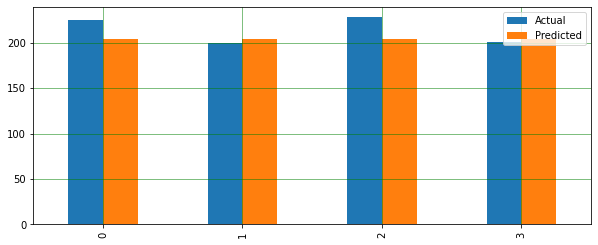

In [94]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

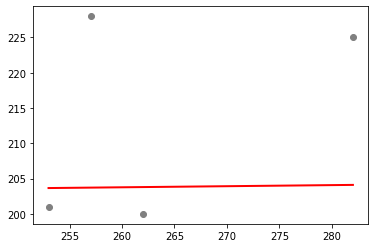

In [95]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.9074372982369
Mean Squared Error: 261.7951475626847
Root Mean Squared Error: 16.18008490591705
